<a href="https://colab.research.google.com/github/woodskd24/MS_DS_Capstone/blob/main/FinalCapstone_KelseyWoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gastric Sleeve Weight Loss: A Timeseries Analysis Self-Case Study

**Hypothesis**


*   Null Hypothesis (H0): There is no significant change in average weight loss in myself following a standard diet and exercise program prescribed by my registered dietician following gastric sleeve surgery
*   Alternative Hypothesis (H1): There is a significant difference in average
weight loss in myself following a standard diet and exercise program prescribed by my registered dietician following gastric sleeve surgery.



##Preparation

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
%load_ext autoreload
%autoreload 2

In [70]:
import sys

!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


##Cleaning

In [71]:
from pathlib import Path

import numpy as np
import pandas as pd
import requests

import ydata_profiling
from ydata_profiling.utils.cache import cache_file

In [72]:
df = pd.read_csv("/content/drive/MyDrive/MS Data Science Courses/CS 668 Capstone/Final Data/Predicted/WeightData_Official11_15 .csv")

In [73]:
print(df.isnull().sum())

print(df.describe())

Date                             0
Weight                           0
Height (in)                      0
Yesterday Weight Loss            0
Weight Loss Total PostOp         0
Weight Loss Total Since PreOp    0
BMI                              0
BMI Class                        0
Bust                             0
Hip                              0
Waist                            0
Protein Intake                   0
Exercise                         0
Diet Stage                       0
dtype: int64
           Weight  Height (in)  Yesterday Weight Loss  \
count   83.000000         83.0              83.000000   
mean   236.530120         67.0               0.374699   
std      7.319365          0.0               0.826813   
min    228.200000         67.0              -1.000000   
25%    231.450000         67.0              -0.100000   
50%    234.100000         67.0               0.200000   
75%    239.600000         67.0               0.600000   
max    258.600000         67.0           

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           83 non-null     object 
 1   Weight                         83 non-null     float64
 2   Height (in)                    83 non-null     int64  
 3   Yesterday Weight Loss          83 non-null     float64
 4   Weight Loss Total PostOp       83 non-null     float64
 5   Weight Loss Total Since PreOp  83 non-null     float64
 6   BMI                            83 non-null     float64
 7   BMI Class                      83 non-null     object 
 8   Bust                           83 non-null     float64
 9   Hip                            83 non-null     float64
 10  Waist                          83 non-null     float64
 11  Protein Intake                 83 non-null     int64  
 12  Exercise                       83 non-null     objec

##EDA (Exploratory Data Analysis)

In [75]:
report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=True
)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
report.to_file("output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Time Series

In [224]:
import pandas as pd

In [225]:
df = pd.read_csv("/content/drive/MyDrive/MS Data Science Courses/CS 668 Capstone/Final Data/Predicted/Current_10_16.xlsx - Sheet1.csv")

In [226]:
!pip install prophet
import prophet as Prophet

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [228]:
df['Date'] = pd.to_datetime(df['Date'])
data = df[["Date", "Weight"]]
data.set_index('Date', inplace=True)
print(data.head(5))


            Weight
Date              
2023-08-25   258.6
2023-08-26   258.0
2023-08-27   256.8
2023-08-28   255.0
2023-08-29   254.3


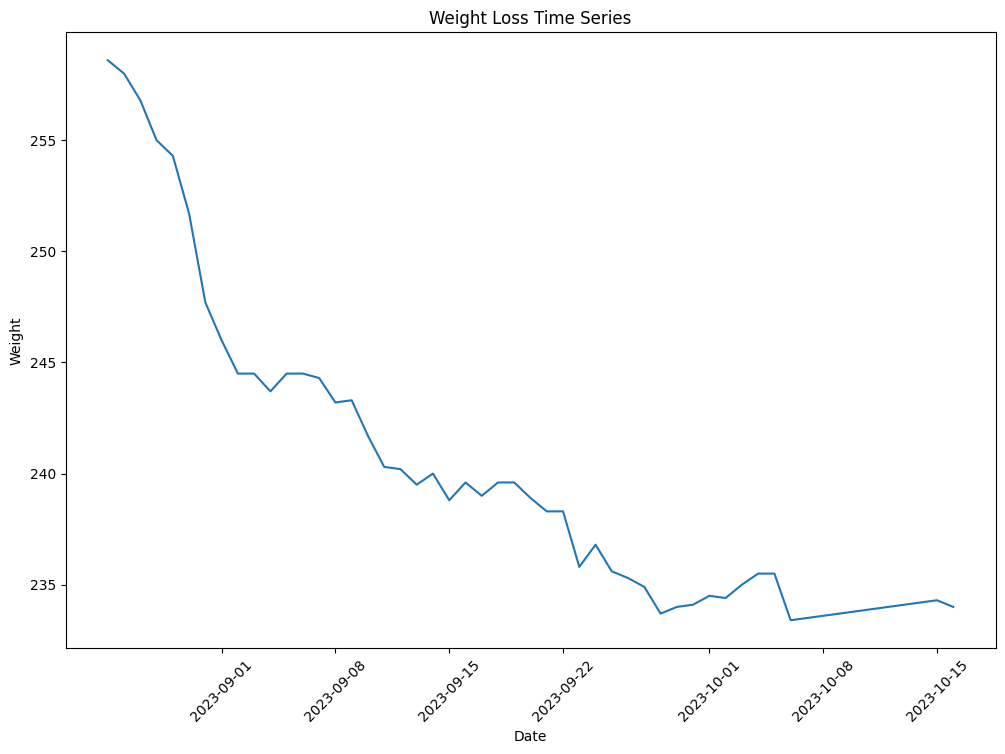

In [229]:
plt.figure(figsize=(12, 8))
plt.plot(data['Weight'])
plt.title("Weight Loss Time Series")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

In [230]:
decomposition = sm.tsa.seasonal_decompose(data['Weight'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [231]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Weight'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -4.2475710524381896
p-value: 0.0005468269542407343


The evidence against the null hypothesis is strong, and I would typically reject the null hypothesis in favor of the alternative hypothesis. In other words, I would conclude that there is a statistically significant effect or relationship in my weight data.

The small p-value (0.0005468269542407343) suggests that there is evidence to reject the null hypothesis of non-stationarity, and the negative ADF Statistic provides additional support for stationarity. Therefore, the evidence suggests that the time series data is stationary.

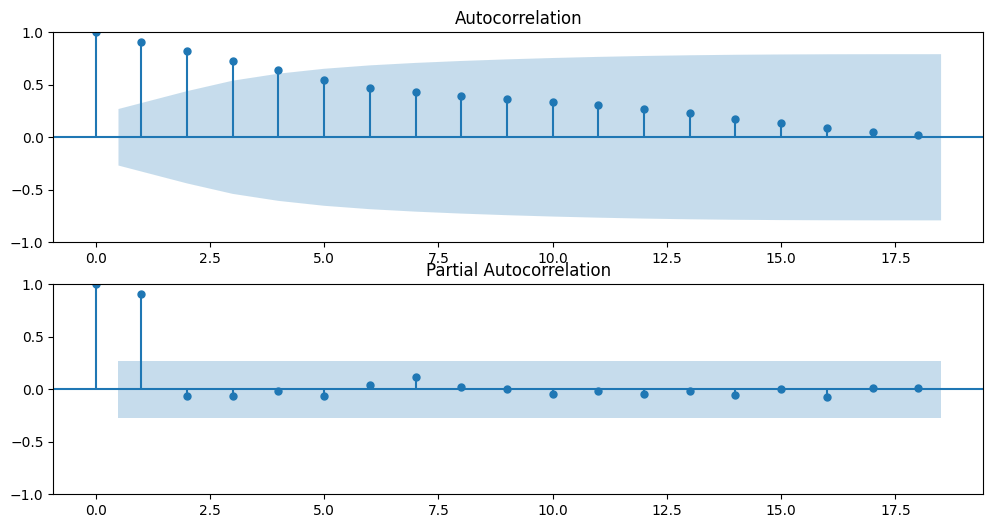

In [232]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(data['Weight'], ax=ax1)
plot_pacf(data['Weight'], ax=ax2)
plt.show()


In [233]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(data['Weight'], order=(1,1,1))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [234]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [235]:
from sklearn.metrics import mean_squared_error

predictions = result.forecast(steps=len(test_data))

rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.3321702308413537


An RMSE of 0.74 suggests that the model's predictions have a relatively low average error

In [236]:
forecast_steps = 30
future_forecast = result.forecast(steps=forecast_steps)
print("Future Forecast:", future_forecast)

Future Forecast: 2023-10-17    233.975909
2023-10-18    233.953093
2023-10-19    233.931483
2023-10-20    233.911016
2023-10-21    233.891632
2023-10-22    233.873273
2023-10-23    233.855885
2023-10-24    233.839416
2023-10-25    233.823819
2023-10-26    233.809046
2023-10-27    233.795055
2023-10-28    233.781804
2023-10-29    233.769254
2023-10-30    233.757367
2023-10-31    233.746109
2023-11-01    233.735446
2023-11-02    233.725348
2023-11-03    233.715783
2023-11-04    233.706725
2023-11-05    233.698145
2023-11-06    233.690019
2023-11-07    233.682323
2023-11-08    233.675034
2023-11-09    233.668131
2023-11-10    233.661592
2023-11-11    233.655400
2023-11-12    233.649535
2023-11-13    233.643980
2023-11-14    233.638719
2023-11-15    233.633736
Freq: D, Name: predicted_mean, dtype: float64


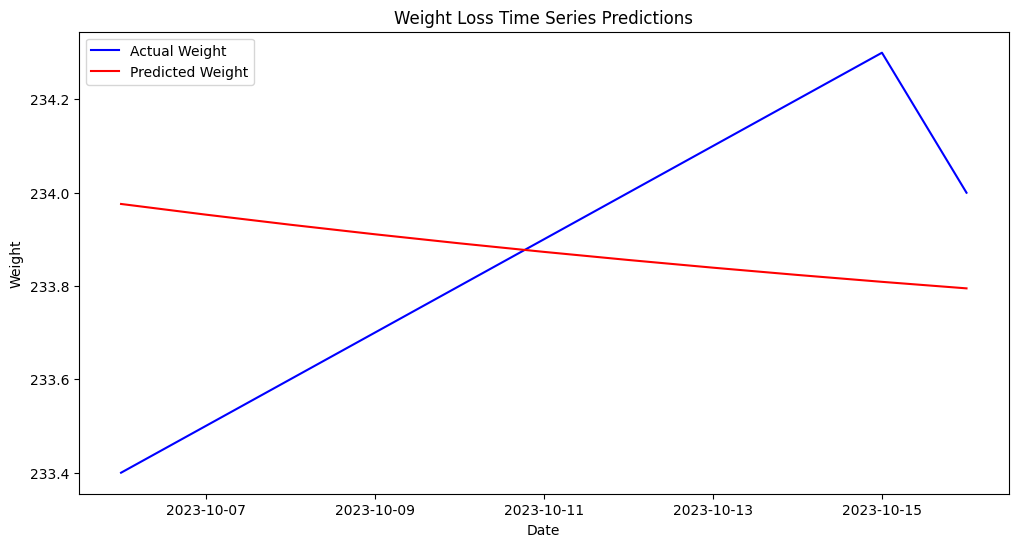

In [237]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Weight'], label='Actual Weight', color='blue')

plt.plot(test_data.index, predictions, label='Predicted Weight', color='red')

plt.title("Weight Loss Time Series Predictions")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.show()


Future Forecast: 2023-10-17    233.975909
2023-10-18    233.953093
2023-10-19    233.931483
2023-10-20    233.911016
2023-10-21    233.891632
2023-10-22    233.873273
2023-10-23    233.855885
2023-10-24    233.839416
2023-10-25    233.823819
2023-10-26    233.809046
2023-10-27    233.795055
2023-10-28    233.781804
2023-10-29    233.769254
2023-10-30    233.757367
2023-10-31    233.746109
2023-11-01    233.735446
2023-11-02    233.725348
2023-11-03    233.715783
2023-11-04    233.706725
2023-11-05    233.698145
2023-11-06    233.690019
2023-11-07    233.682323
2023-11-08    233.675034
2023-11-09    233.668131
2023-11-10    233.661592
2023-11-11    233.655400
2023-11-12    233.649535
2023-11-13    233.643980
2023-11-14    233.638719
2023-11-15    233.633736
Freq: D, Name: predicted_mean, dtype: float64
         Date  Weight  Height (in)  Yesterday Weight Loss  \
0  2023-08-25   258.6           67                    0.0   
1  2023-08-26   258.0           67                    0.6   
2  2

<ipython-input-238-d12c92188c58>:7: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')


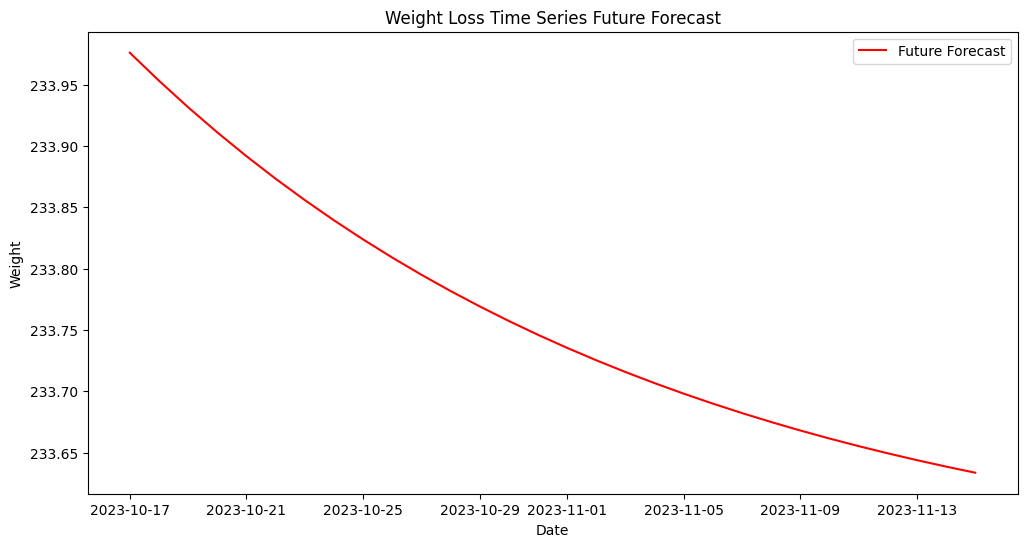

In [238]:
forecast_steps = 30
future_forecast = result.forecast(steps=forecast_steps)
print("Future Forecast:", future_forecast)
print(df)

last_date = data.index[-1]
date_range = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')


plt.figure(figsize=(12, 6))
plt.plot(future_forecast, label='Future Forecast', color='red')

plt.title("Weight Loss Time Series Future Forecast")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.show()


##Cross Validation

In [239]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [240]:
def arima_cross_validation(data, order, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = []

    for train_index, test_index in tscv.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
        model = sm.tsa.arima.ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, forecast)
        scores.append(mse)

    return scores

In [241]:
p, d, q = (1, 1, 1)
scores = arima_cross_validation(data, order=(p, d, q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [242]:
average_mse = np.mean(scores)
print(f'Average Mean Squared Error: {average_mse}')

Average Mean Squared Error: 5.264556426599054


The average MSE of 7.68 implies that, on average, my model's daily weight predictions are off by about 7.68 square pounds

##Model Evaluation

In [243]:
forecast_df = pd.DataFrame({'Predicted': future_forecast})

forecast_df.to_csv('forecast_result.csv', index=False)

In [244]:
total = pd.read_csv("/content/drive/MyDrive/MS Data Science Courses/CS 668 Capstone/Final Data/Predicted/forecast_result -final.csv")
total.head(5)

Date  Predicted  Actual
0  10/17/2023      234.0   233.9
1  10/18/2023      234.0   233.4
2  10/19/2023      233.9   233.0
3  10/20/2023      233.9   232.5
4  10/21/2023      233.9   232.0

In [245]:
df = total.drop('Date', axis=1)
df.head(5)

Predicted  Actual
0      234.0   233.9
1      234.0   233.4
2      233.9   233.0
3      233.9   232.5
4      233.9   232.0

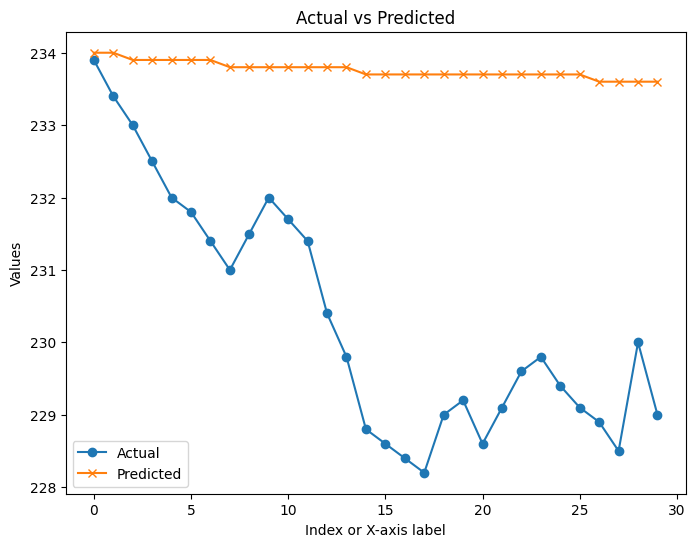

In [246]:
plt.figure(figsize=(8, 6))
plt.plot(df['Actual'], label='Actual', marker='o')
plt.plot(df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Index or X-axis label')
plt.ylabel('Values')
plt.legend()
plt.show()

In [247]:
from sklearn.metrics import mean_squared_error

Y_true = df['Actual']

Y_pred = df['Predicted']

mean_squared_error(Y_true,Y_pred)

14.108999999999968

##New Data

In [248]:
import pandas as pd

In [249]:
df = pd.read_csv("/content/drive/MyDrive/MS Data Science Courses/CS 668 Capstone/Final Data/Predicted/WeightData_Official11_15 .csv")

In [250]:
df['Date'] = pd.to_datetime(df['Date'])
data = df[["Date", "Weight"]]

data.set_index('Date', inplace=True)

print(data.head(5))


            Weight
Date              
2023-08-25   258.6
2023-08-26   258.0
2023-08-27   256.8
2023-08-28   255.0
2023-08-29   254.3


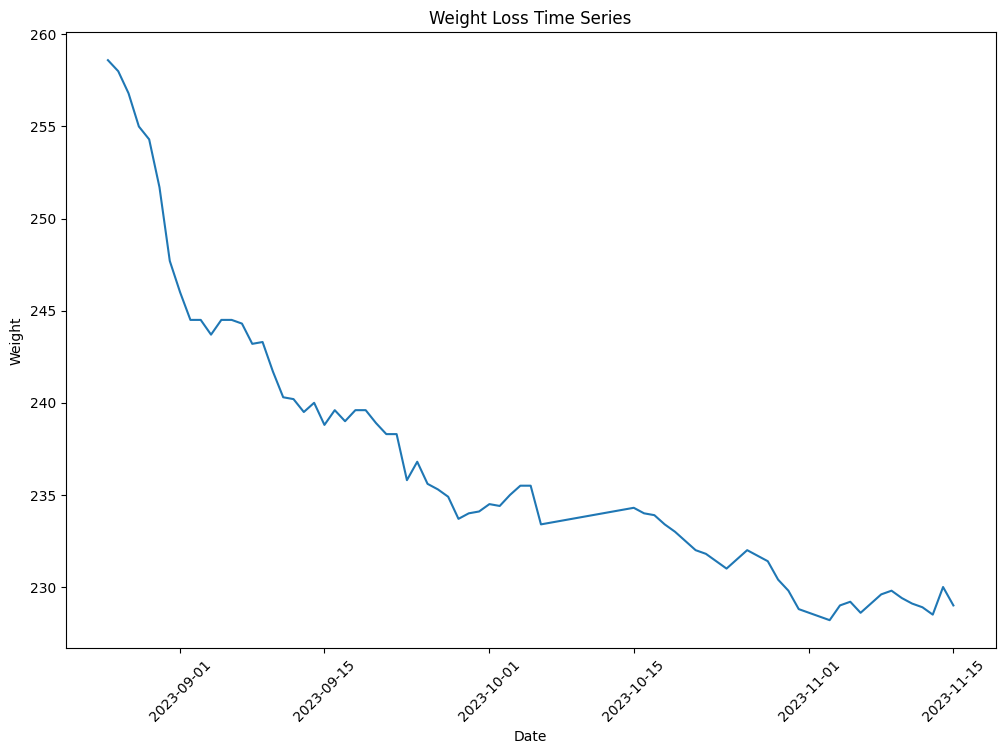

In [251]:
plt.figure(figsize=(12, 8))
plt.plot(data['Weight'])
plt.title("Weight Loss Time Series")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

In [252]:
decomposition = sm.tsa.seasonal_decompose(data['Weight'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [253]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Weight'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -3.8546283806856723
p-value: 0.002395326123769569


The evidence against the null hypothesis is strong, and I would typically reject the null hypothesis in favor of the alternative hypothesis. In other words, I would conclude that there is a statistically significant effect or relationship in my weight data.

The small p-value (0.008856646478535898) suggests that there is evidence to reject the null hypothesis of non-stationarity, and the negative ADF Statistic provides additional support for stationarity. Therefore, the evidence suggests that the time series data is stationary.

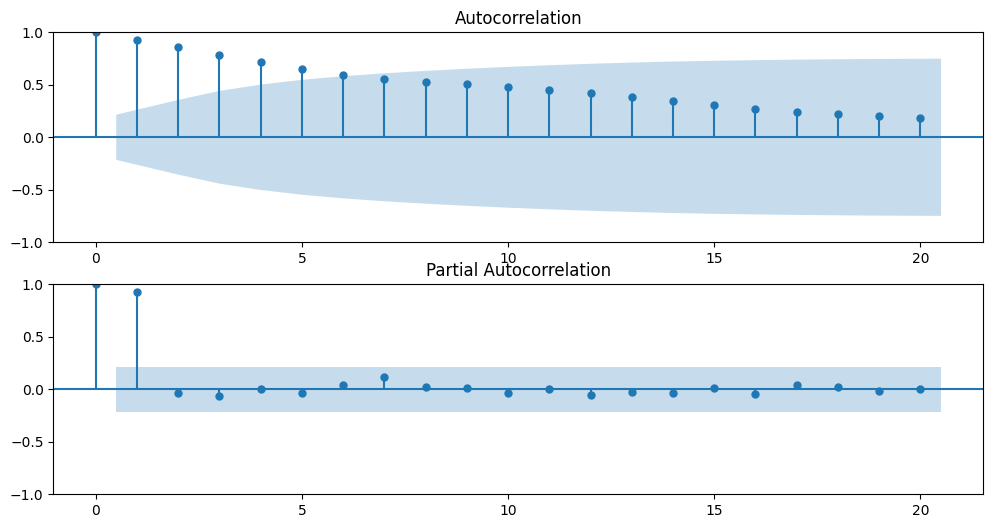

In [254]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(data['Weight'], ax=ax1)
plot_pacf(data['Weight'], ax=ax2)
plt.show()


In [255]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(data['Weight'], order=(1,1,1))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [256]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [257]:
from sklearn.metrics import mean_squared_error

predictions = result.forecast(steps=len(test_data))


rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.7397182165182172


In [258]:
forecast_steps = 30
future_forecast = result.forecast(steps=forecast_steps)
print("Future Forecast:", future_forecast)

Future Forecast: 2023-11-16    228.951973
2023-11-17    228.904983
2023-11-18    228.859010
2023-11-19    228.814030
2023-11-20    228.770022
2023-11-21    228.726965
2023-11-22    228.684839
2023-11-23    228.643623
2023-11-24    228.603299
2023-11-25    228.563845
2023-11-26    228.525245
2023-11-27    228.487478
2023-11-28    228.450528
2023-11-29    228.414377
2023-11-30    228.379007
2023-12-01    228.344401
2023-12-02    228.310543
2023-12-03    228.277417
2023-12-04    228.245007
2023-12-05    228.213298
2023-12-06    228.182274
2023-12-07    228.151920
2023-12-08    228.122223
2023-12-09    228.093167
2023-12-10    228.064739
2023-12-11    228.036926
2023-12-12    228.009714
2023-12-13    227.983089
2023-12-14    227.957041
2023-12-15    227.931555
Freq: D, Name: predicted_mean, dtype: float64


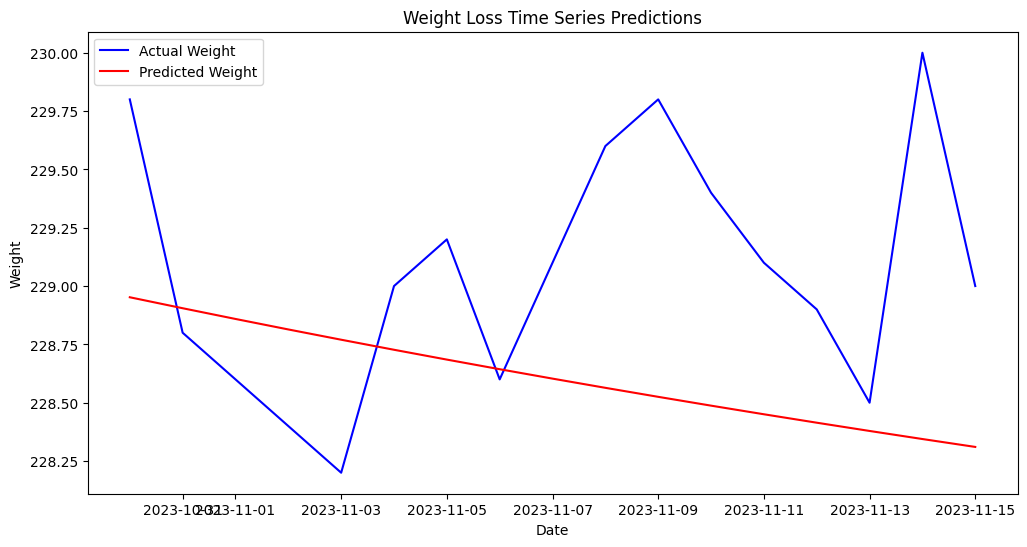

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Weight'], label='Actual Weight', color='blue')

plt.plot(test_data.index, predictions, label='Predicted Weight', color='red')

plt.title("Weight Loss Time Series Predictions")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.show()


Future Forecast: 2023-11-16    228.951973
2023-11-17    228.904983
2023-11-18    228.859010
2023-11-19    228.814030
2023-11-20    228.770022
2023-11-21    228.726965
2023-11-22    228.684839
2023-11-23    228.643623
2023-11-24    228.603299
2023-11-25    228.563845
2023-11-26    228.525245
2023-11-27    228.487478
2023-11-28    228.450528
2023-11-29    228.414377
2023-11-30    228.379007
2023-12-01    228.344401
2023-12-02    228.310543
2023-12-03    228.277417
2023-12-04    228.245007
2023-12-05    228.213298
2023-12-06    228.182274
2023-12-07    228.151920
2023-12-08    228.122223
2023-12-09    228.093167
2023-12-10    228.064739
2023-12-11    228.036926
2023-12-12    228.009714
2023-12-13    227.983089
2023-12-14    227.957041
2023-12-15    227.931555
Freq: D, Name: predicted_mean, dtype: float64
         Date  Weight  Height (in)  Yesterday Weight Loss  \
0  2023-08-25   258.6           67                    0.0   
1  2023-08-26   258.0           67                    0.6   
2  2

<ipython-input-260-d809450abe17>:11: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')


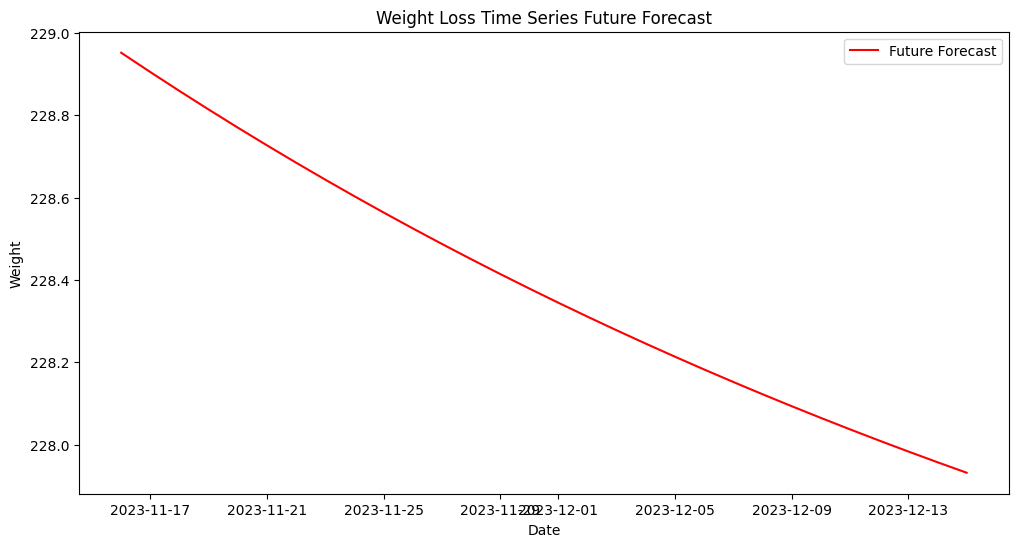

In [260]:

forecast_steps = 30


future_forecast = result.forecast(steps=forecast_steps)
print("Future Forecast:", future_forecast)


print(df)

last_date = data.index[-1]
date_range = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')

plt.figure(figsize=(12, 6))
plt.plot(future_forecast, label='Future Forecast', color='red')

plt.title("Weight Loss Time Series Future Forecast")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.show()


##Cross Validation for New Data

In [261]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [262]:
def arima_cross_validation(data, order, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = []

    for train_index, test_index in tscv.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
        model = sm.tsa.arima.ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, forecast)
        scores.append(mse)

    return scores

In [263]:
p, d, q = (1, 1, 1)
scores = arima_cross_validation(data, order=(p, d, q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [264]:
average_mses = np.mean(scores)
print(f'Average Mean Squared Error: {average_mses}')

Average Mean Squared Error: 3.647388174740821


The average MSE of 3.65 implies that, on average, my model's daily weight predictions are off by about 3.65 square pounds

##Comparison

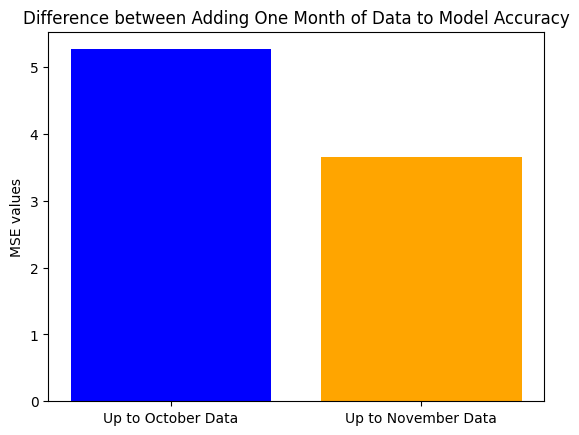

In [265]:
plt.bar(['Up to October Data', 'Up to November Data'], [average_mse, average_mses], color=['blue', 'orange'])
plt.ylabel('MSE values')
plt.title('Difference between Adding One Month of Data to Model Accuracy')
plt.show()

In [266]:
import numpy as np

absolute_difference = np.abs(np.array(average_mse) - np.array(average_mses))
print("Absolute Difference:", absolute_difference)

relative_difference = (np.abs(np.array(average_mse) - np.array(average_mses)) / np.array(average_mse)) * 100
print("Relative Difference (%):", relative_difference)


Absolute Difference: 1.6171682518582324
Relative Difference (%): 30.71803435684583


*   The absolute difference of 1.62 suggests a substantial numerical difference between the two values.
*   The relative difference of 30.72% indicates that the difference is significant relative to one of the values.
*   Specifically, the difference is about 30.72% of one of the values.



*This indicates that as more data is added the accuracy of the model improves significantly*

##Takeaways

*I will continue to add to this model to improve the accuracy of the model and create a much greater chance of having accurate predictions of my weight loss. The hypothesis, however, appears to be supported through the statistical significance of the model*